### Link do Repositório
https://github.com/viniolvs/tds-data-analysis

### Importando as bibliotecas

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Carregando a base de dados

In [18]:
!head data.csv

Agente  Causador  Acidente;Data Acidente;CBO;CBO;CID-10;CID-10;CNAE2.0 Empregador;CNAE2.0 Empregador;Emitente CAT;Esp�cie do benef�cio;Filia��o Segurado;Indica acidente;Munic Empr;Natureza da Les�o;Origem de Cadastramento CAT;Parte Corpo Atingida;Sexo;Tipo do Acidente;UF  Munic.  Acidente;UF Munic. Empregador;Data  Afastamento;Data Despacho Benef�cio;Data Acidente;Data Nascimento;Data Emiss�o CAT
Esforco Excessivo ao;2019/02;784205;784205-Alimentador d;M659  ;M65.9 Sinovite e Ten;1012;Abate de Suinos, Ave;Empregador          ;Pa                  ;Empregado           ;N�o                 ;420545-Forquilhinha ;Inflamacao de Articu;Internet            ;Membros Superiores, ;Feminino            ;Doen�a              ;{� class}           ;Santa Catarina      ;2019/10;0000/00;01/02/2019;17/09/1973;18/10/2019
Chao - Superficie Ut;2019/02;911305;911305-Mec. Manut. M;M170  ;M17.0 Gonartrose Pri;2391;Aparelhamento e Outr;Empregador          ;Pa                  ;Empregado           ;N�o           

In [19]:
data = pd.read_csv('data.csv', encoding="ISO-8859-1", sep=";")
# Filtra a base para dezembro de 2019
data.iloc[:,-1] = pd.to_datetime(data.iloc[:,-1], format='%d/%m/%Y')
data.head()

,Agente Causador Acidente,Data Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,...,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Afastamento,Data Despacho Benefício,Data Acidente.1,Data Nascimento,Data Emissão CAT
0,Esforco Excessivo ao,2019/02,784205,784205-Alimentador d,M659,M65.9 Sinovite e Ten,1012,"Abate de Suinos, Ave",Empregador,Pa,...,"Membros Superiores,",Feminino,Doença,{ñ class},Santa Catarina,2019/10,0000/00,01/02/2019,17/09/1973,2019-10-18 00:00:00
1,Chao - Superficie Ut,2019/02,911305,911305-Mec. Manut. M,M170,M17.0 Gonartrose Pri,2391,Aparelhamento e Outr,Empregador,Pa,...,Joelho,Masculino,Típico,{ñ class},Espírito Santo,2019/10,0000/00,07/02/2019,14/12/1971,2019-10-28 00:00:00
2,"Politriz, Lixadora,",2019/01,724410,724410-Caldeireiro (,S660,S66.0 Traum Musc Fle,2829,Fabricacao de Maquin,Empregador,Afastamento Até 15 D,...,Mao (Exceto Punho ou,Masculino,Típico,Maranhão,São Paulo,2019/09,0000/00,31/01/2019,05/04/1974,2019-10-02 00:00:00
3,Rua e Estrada - Supe,2019/02,622110,622110-Trab. Cultura,M511,M51.1 Transt Disco L,1071,Fabricacao de Acucar,Empregador,Pa,...,Dorso (Inclusive Mus,Masculino,Típico,Maranhão,São Paulo,2019/10,0000/00,01/02/2019,06/03/1986,2019-10-30 00:00:00
4,Reacao do Corpo a Mo,2019/02,413210,413210-Caixa Banco,M751,M75.1 Sindr do Mangu,6422,"Bancos Multiplos, co",Sindicato,Pa,...,"Membros Superiores,",Masculino,Doença,Tocantins,Rio de Janeiro,2019/10,0000/00,12/02/2019,07/07/1969,2019-10-22 00:00:00


In [20]:

start_date = pd.to_datetime('2019-12-01')
end_date = pd.to_datetime('2019-12-31')
df = data.loc[(data.iloc[:, -1] >= start_date) & (data.iloc[:, -1] <= end_date)]
df.head()

,Agente Causador Acidente,Data Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,...,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Afastamento,Data Despacho Benefício,Data Acidente.1,Data Nascimento,Data Emissão CAT
81691,"Macaco (Mecanico, Hi",2019/02,415210,415210-Oper. Triagem,M511,M51.1 Transt Disco L,5310,Atividades de Correi,Empregador,Pa,...,Dorso (Inclusive Mus,Masculino,Típico,Acre,Pará,2019/12,0000/00,12/02/2019,09/08/1967,2019-12-18 00:00:00
81692,Esforco Excessivo ao,2019/04,325105,325105-Auxiliar Técn,M755,M75.5 Bursite do Omb,8610,Atividades de Atendi,Empregador,Pa,...,Partes Multiplas - A,Feminino,Doença,{ñ class},Rio Grande do Sul,2019/12,0000/00,23/04/2019,18/12/1986,2019-12-10 00:00:00
81693,"Esforco Excessivo, N",2019/05,413205,413205-Atendente Agê,M755,M75.5 Bursite do Omb,6422,"Bancos Multiplos, co",Sindicato,Pa,...,"Membros Superiores,",Feminino,Doença,Tocantins,Rio de Janeiro,2019/12,0000/00,17/05/2019,05/02/1988,2019-12-12 00:00:00
81694,"Motocicleta, Motonet",2019/04,517410,517410-Porteiro de E,S835,S83.5 Entorse Disten,9499,Atividades Associati,Empregador,Pa,...,Joelho,Masculino,Trajeto,Maranhão,São Paulo,2019/11,0000/00,23/04/2019,29/08/1998,2019-12-10 00:00:00
81695,Escada Movel ou Fixa,2019/05,622505,622505-Trab. Cultivo,S622,S62.2 Frat do Primei,131,Cultivo de Laranja,Empregador,Pa,...,Braco (Entre O Punho,Feminino,Típico,Maranhão,São Paulo,2019/12,0000/00,23/05/2019,02/07/1965,2019-12-10 00:00:00


In [21]:
df.describe()

,CBO,CNAE2.0 Empregador
count,31738.000000,31738.000000
mean,585396.082677,4848.483962
std,202150.833104,2748.038341
min,0.000000,0.000000
25%,415205.000000,2542.000000
50%,521115.000000,4711.000000
75%,782510.000000,8012.000000
max,992225.000000,9900.000000


### Analisando a coluna UF Munic. Acidente

In [22]:
df['UF  Munic.  Acidente'].value_counts()

UF  Munic.  Acidente
Maranhão                11262
{ñ class}               10081
Rondônia                 3368
Roraima                  2431
Tocantins                2126
Pará                      700
Acre                      530
Ceará                     442
Pernambuco                198
Amazonas                  173
Piauí                     146
Amapá                      90
Sergipe                    74
Rio Grande Norte           52
Paraíba                    34
Alagoas                    31
Name: count, dtype: int64

<Axes: xlabel='UF  Munic.  Acidente'>

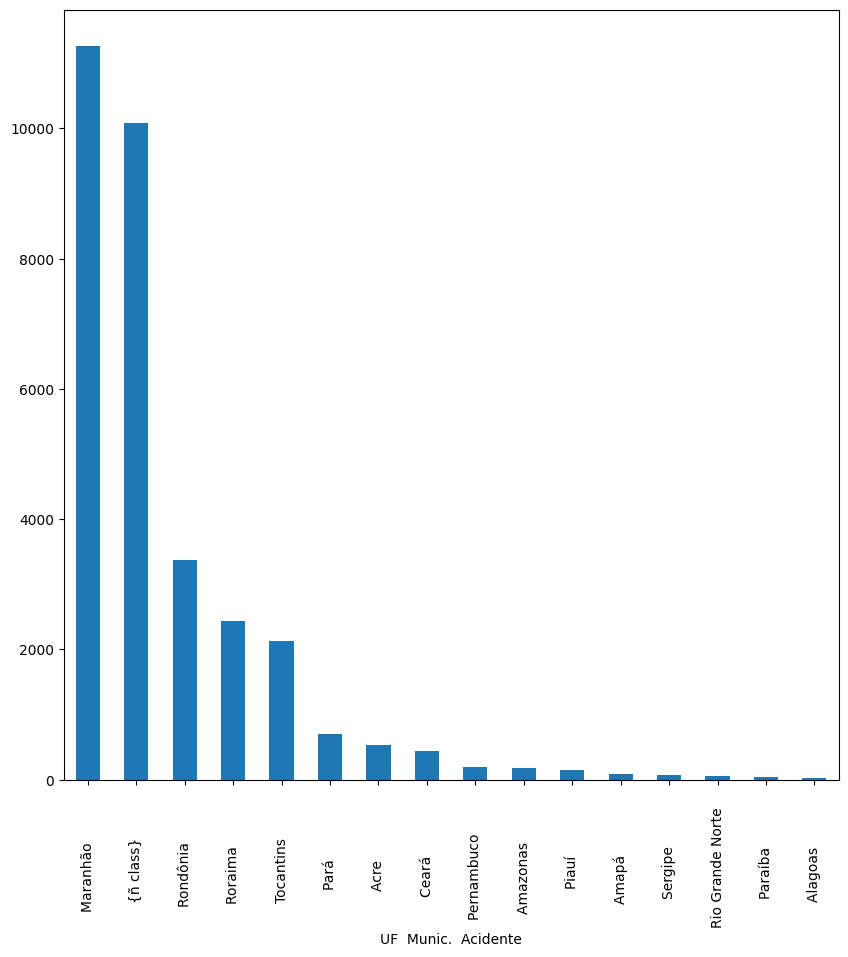

In [23]:
df['UF  Munic.  Acidente'].value_counts().plot(kind='bar', figsize=(10,10))

### Analisando Tipo do Acidente

In [24]:

df['Tipo do Acidente'].value_counts()

Tipo do Acidente
Típico                  28625
Trajeto                  2383
Doença                    730
Name: count, dtype: int64

<Axes: ylabel='count'>

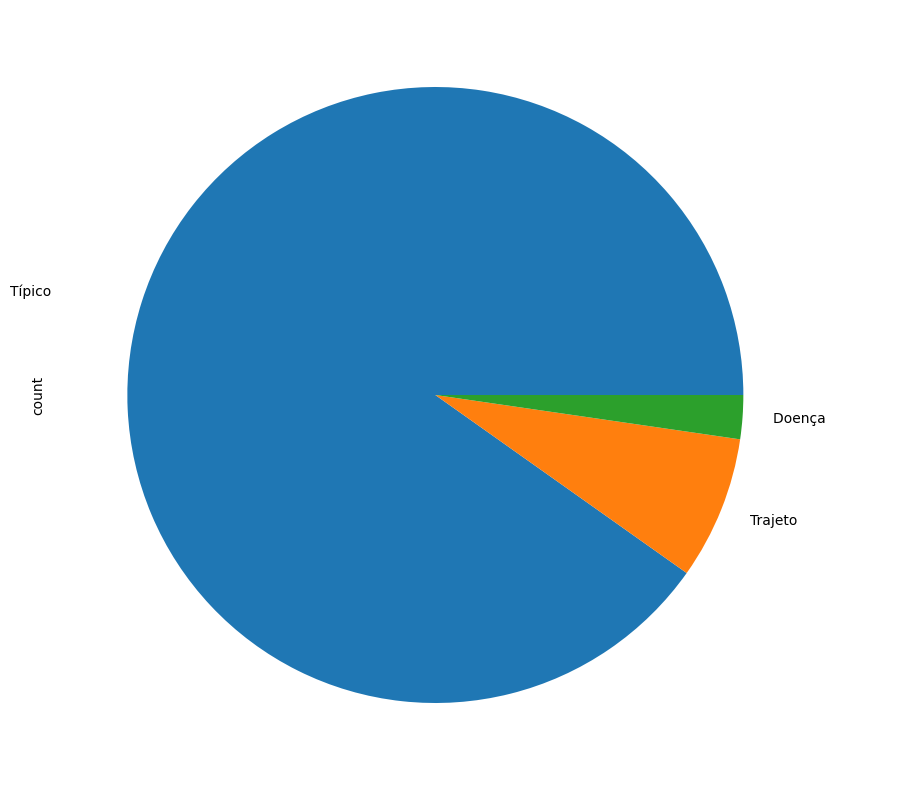

In [25]:
df['Tipo do Acidente'].value_counts().plot(kind='pie', figsize=(10,10))

### Analisando Data de Nascimento (idade)

In [31]:
# Criando a coluna idade
df['Data Nascimento'] = pd.to_datetime(df['Data Nascimento'], format='%d/%m/%Y', errors='coerce')
current_date = datetime.now()
df['idade'] = df['Data Nascimento'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

/tmp/ipykernel_3378556/1929612297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data Nascimento'] = pd.to_datetime(df['Data Nascimento'], format='%d/%m/%Y', errors='coerce')
/tmp/ipykernel_3378556/1929612297.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['idade'] = df['Data Nascimento'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))


,Agente Causador Acidente,Data Acidente,CBO,CBO.1,CID-10,CID-10.1,CNAE2.0 Empregador,CNAE2.0 Empregador.1,Emitente CAT,Espécie do benefício,...,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Data Afastamento,Data Despacho Benefício,Data Acidente.1,Data Nascimento,Data Emissão CAT,idade
81691,"Macaco (Mecanico, Hi",2019/02,415210,415210-Oper. Triagem,M511,M51.1 Transt Disco L,5310,Atividades de Correi,Empregador,Pa,...,Masculino,Típico,Acre,Pará,2019/12,0000/00,12/02/2019,1967-08-09,2019-12-18 00:00:00,56.0
81692,Esforco Excessivo ao,2019/04,325105,325105-Auxiliar Técn,M755,M75.5 Bursite do Omb,8610,Atividades de Atendi,Empregador,Pa,...,Feminino,Doença,{ñ class},Rio Grande do Sul,2019/12,0000/00,23/04/2019,1986-12-18,2019-12-10 00:00:00,37.0
81693,"Esforco Excessivo, N",2019/05,413205,413205-Atendente Agê,M755,M75.5 Bursite do Omb,6422,"Bancos Multiplos, co",Sindicato,Pa,...,Feminino,Doença,Tocantins,Rio de Janeiro,2019/12,0000/00,17/05/2019,1988-02-05,2019-12-12 00:00:00,36.0
81694,"Motocicleta, Motonet",2019/04,517410,517410-Porteiro de E,S835,S83.5 Entorse Disten,9499,Atividades Associati,Empregador,Pa,...,Masculino,Trajeto,Maranhão,São Paulo,2019/11,0000/00,23/04/2019,1998-08-29,2019-12-10 00:00:00,25.0
81695,Escada Movel ou Fixa,2019/05,622505,622505-Trab. Cultivo,S622,S62.2 Frat do Primei,131,Cultivo de Laranja,Empregador,Pa,...,Feminino,Típico,Maranhão,São Paulo,2019/12,0000/00,23/05/2019,1965-07-02,2019-12-10 00:00:00,58.0


Text(0.5, 0, 'Idade')

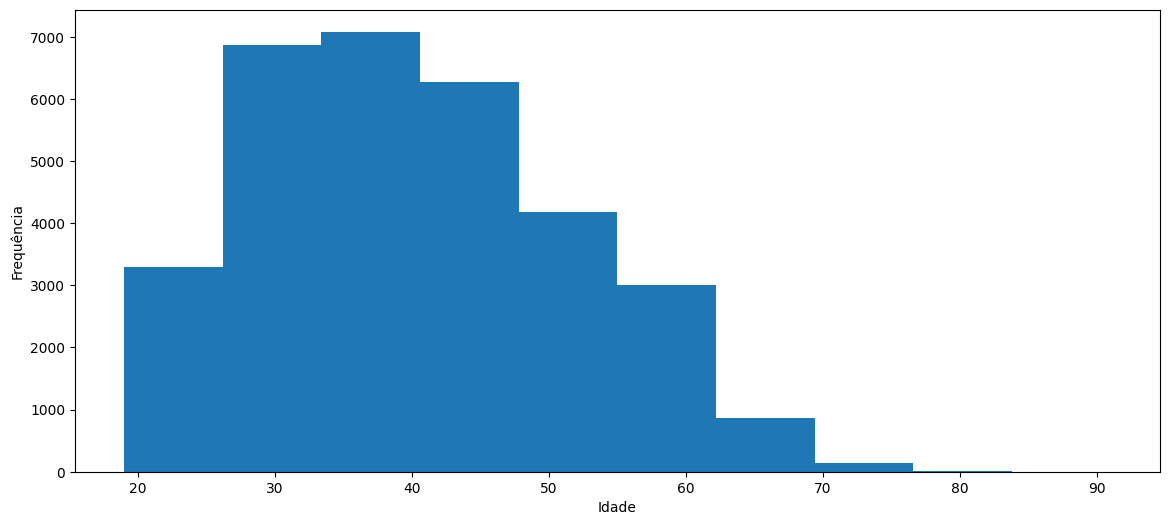

In [33]:
ax = df['idade'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Frequência')
ax.set_xlabel('Idade')

### Analisando a coluna Sexo

<Axes: xlabel='Sexo'>

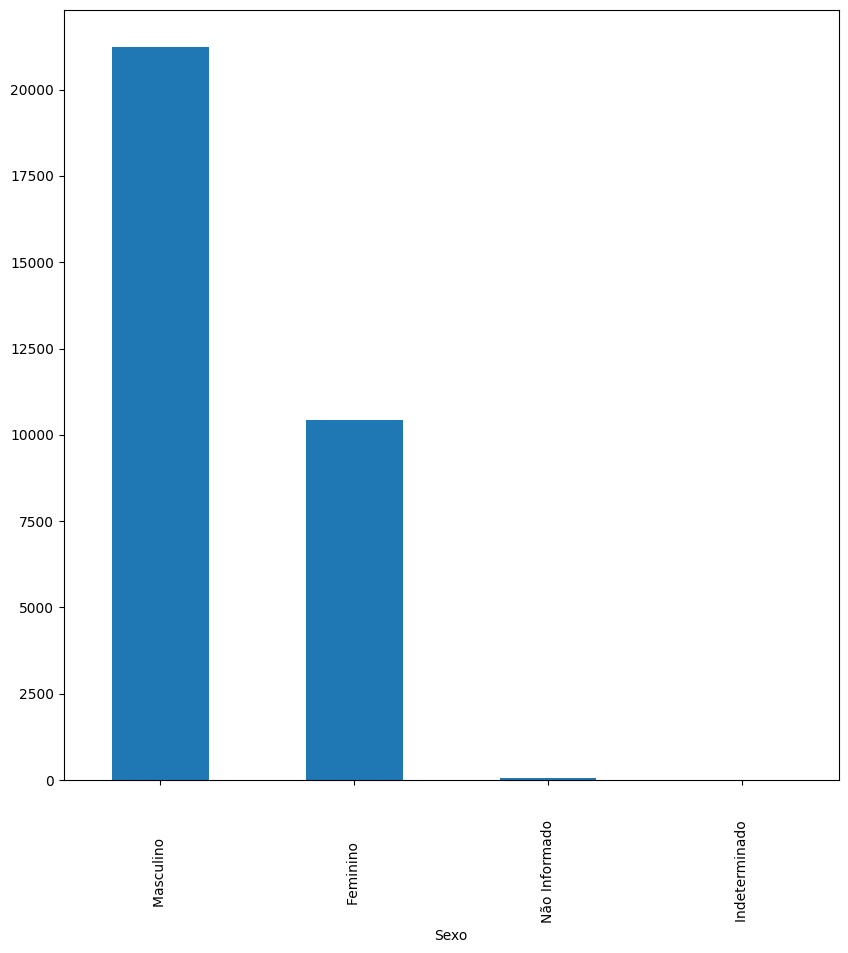

In [38]:
df['Sexo'].value_counts().plot(kind='bar', figsize=(10,10))

### Distribuição de Idade por Sexo

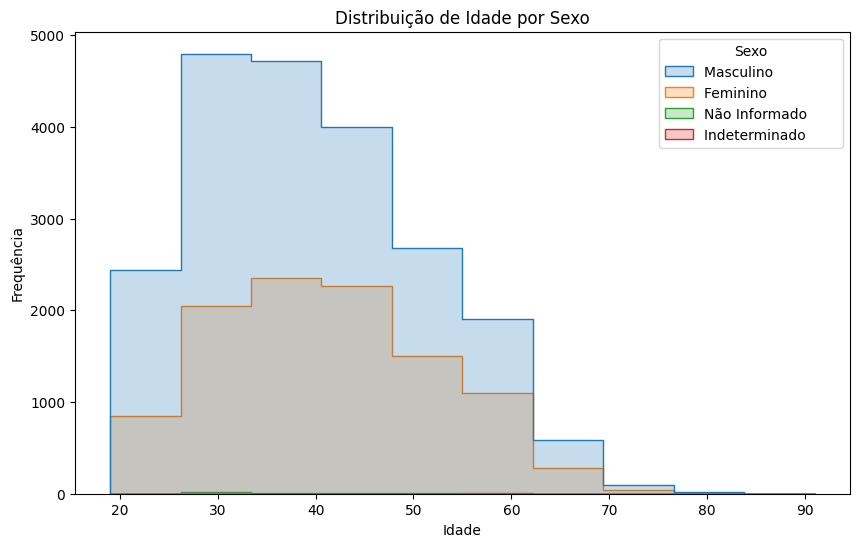

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', hue='Sexo', element='step', stat='count', common_norm=False, bins=10)
plt.title('Distribuição de Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

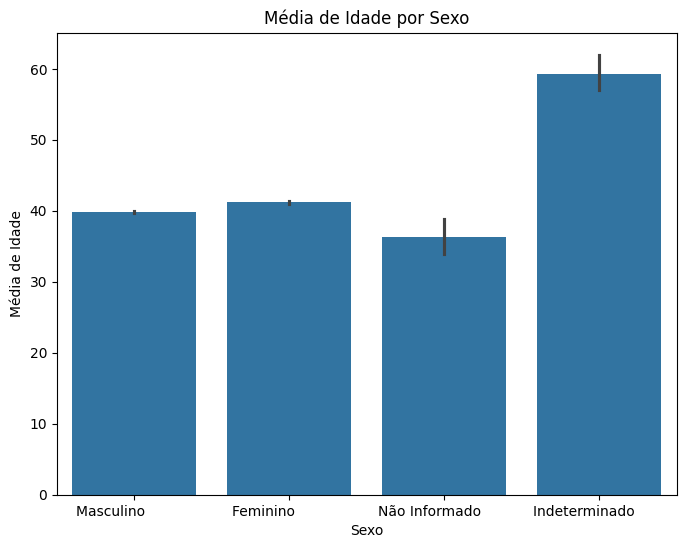

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sexo', y='idade', data=df)
plt.title('Média de Idade por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Média de Idade')
plt.show()

### Distribuição Idade por UF 

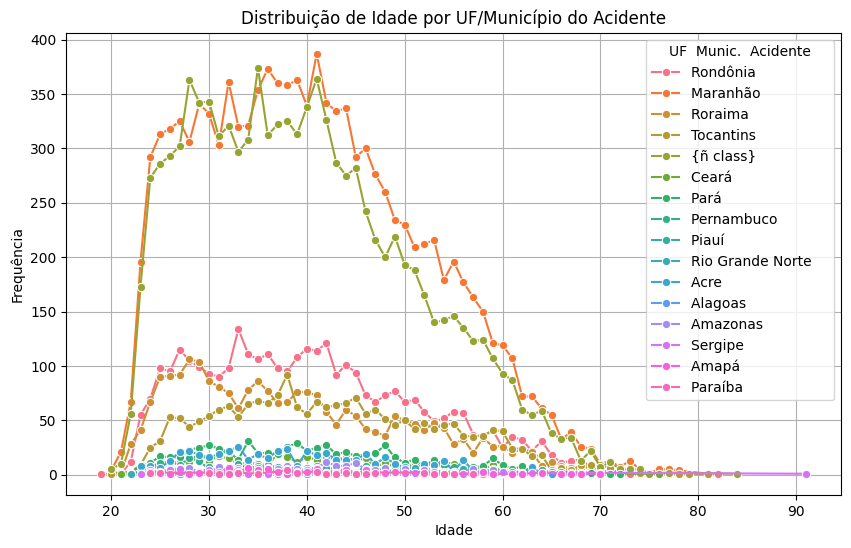

In [56]:
data_line = df.groupby(['idade', 'UF  Munic.  Acidente']).size().reset_index(name='Frequência')

# Criar o gráfico de linhas
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_line, x='idade', y='Frequência', hue='UF  Munic.  Acidente', marker="o")
plt.title('Distribuição de Idade por UF/Município do Acidente')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### Parte do Corpo Atingida

<Axes: xlabel='Parte Corpo Atingida'>

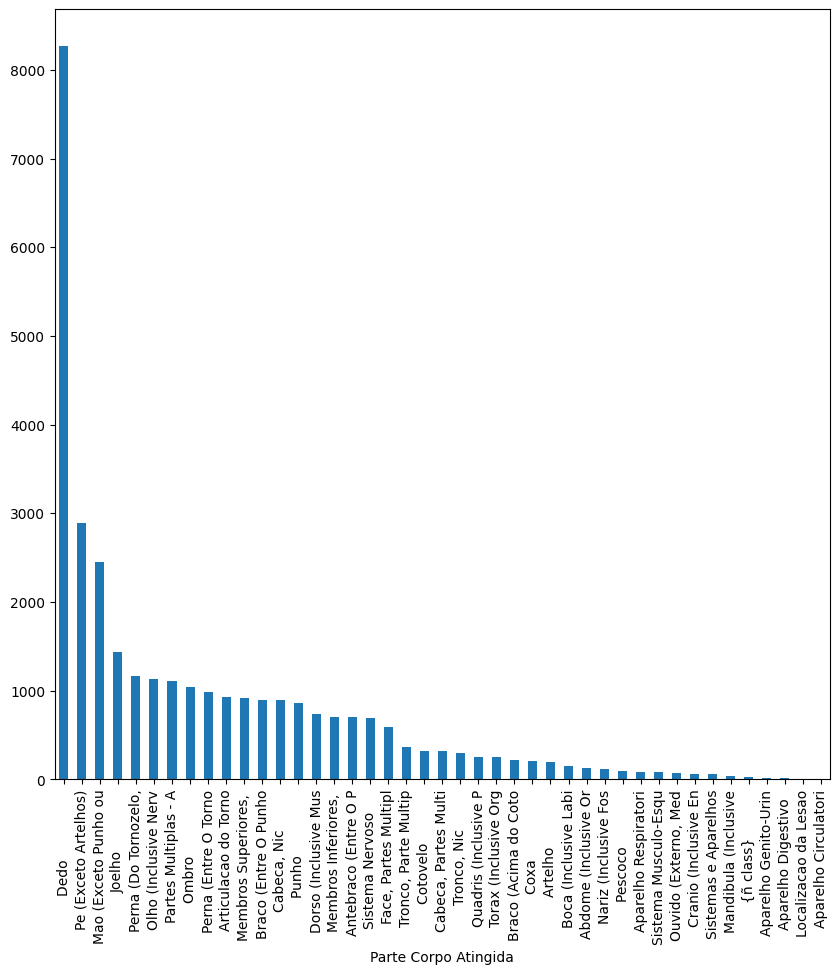

In [57]:
df['Parte Corpo Atingida'].value_counts().plot(kind='bar', figsize=(10,10))